# Regression Problem

In [54]:
import pandas as pd
import numpy as np

In [55]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [56]:
df.shape

(500, 9)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [58]:
df.duplicated().sum()

0

In [59]:
df.drop(columns=["Serial No."], inplace=True)

In [60]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [61]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [62]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [63]:
# Split test and training data

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [65]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,310,104,3,2.0,3.5,8.37,0
438,318,110,1,2.5,3.5,8.54,1
475,300,101,3,3.5,2.5,7.88,0
58,300,99,1,3.0,2.0,6.80,1
380,322,104,3,3.5,4.0,8.84,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


# To make values into same range

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [68]:
x_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

# Creating Neural Network

In [70]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.layers import Dense

In [71]:
model = Sequential()

model.add(Dense(7, activation="relu", input_dim=7))
model.add(Dense(1, activation="linear"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 64 (256.00 Byte)
Trainable params: 64 (256.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
model.compile(loss='mean_squared_error', optimizer='Adam')

In [79]:
history = model.fit(x_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 19ms/step - loss: 0.4841 - val_loss: 0.4118
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3458 - val_loss: 0.2898
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2482 - val_loss: 0.2052
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1793 - val_loss: 0.1474
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1311 - val_loss: 0.1074
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0970 - val_loss: 0.0800
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0736 - val_loss: 0.0612
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0577 - val_loss: 0.0489
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0469 - val_loss: 0.0412
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0400 - val_loss: 0.0365
Epoch 11

In [83]:
y_pred = model.predict(x_test_scaled)

4/4 [==============================] - 0s 5ms/step


In [87]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8027048044528745

In [89]:
import matplotlib.pyplot as plt

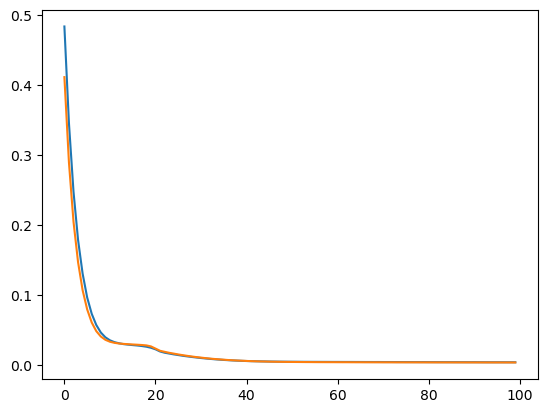

In [91]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])